In [2]:
import django, os, sys, time, resource, re, gc, shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from django.db.models import Count, Avg, F
import math
import matplotlib.cm as cm
import matplotlib.dates as mdates

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *


qid = 1558
q = Query.objects.get(pk=qid)
p = Project.objects.get(title="NETs")

In [40]:
ratings = DocOwnership.objects.filter(
    query__project=p,relevant__in=[1,2,3,4]
).values('user__username','relevant','date','user__id')

df = pd.DataFrame.from_dict(list(ratings)).sort_values('date')

df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.date

df['username'] = df['user__username'].astype('category')

df.head()


,date,relevant,user__id,user__username,day,username
23,2017-03-14 09:42:36.240709+00:00,2,1,galm,2017-03-14,galm
24,2017-03-14 09:42:36.271608+00:00,1,1,galm,2017-03-14,galm
60,2017-03-14 09:42:36.290147+00:00,2,1,galm,2017-03-14,galm
84,2017-03-14 09:42:36.350089+00:00,1,1,galm,2017-03-14,galm
156,2017-03-14 09:42:36.591588+00:00,2,11,delm,2017-03-14,delm


In [81]:
plt.rcParams["figure.figsize"] = [8,5]
colormap = plt.cm.Set2.colors
plt.plot_date(df.date,df.user__id, c=df.relevant, fmt='')

plt.plot_date(df['date'], df['user__id'], c=df['relevant'], fmt='')

#plt.plot(df.date, df.user__id)

plt.show()

ValueError: RGBA sequence should have length 3 or 4

In [59]:

colormap

((0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254))

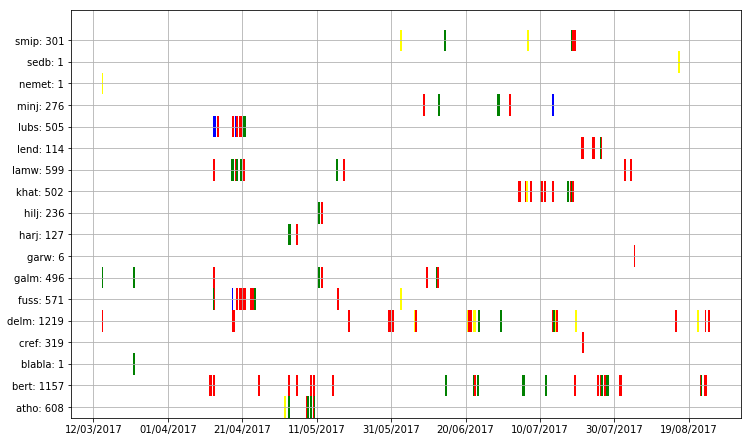

In [126]:
plt.rcParams["figure.figsize"] = [12,7.5]
cmap = ['','green','red','yellow','blue']
i=0
gnames = []



fig, ax = plt.subplots()
for name, group in df.groupby('username'):
    i+=1
    count = len(group)
    gnames.append("{}: {}".format(name,count))
    dates = matplotlib.dates.date2num(group['date'].dt.to_pydatetime())


    y = [i+0.5]*len(dates)
    height = [1]*len(dates)
    colours = [cmap[x] for x in group.relevant]

    ax.bar(dates, [1]*len(dates), bottom=y, color=colours,width=0.5)

ax.grid(True)
plt.yticks(range(2,i+2), gnames)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.savefig('plots/general/ratings_user_time.pdf',bbox_inches='tight') 
plt.show()

In [4]:
qs = Query.objects.filter(project=p).exclude(database="intern")

qs.count()

404